In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [ ]:
def get_cv_idxs(n, cv_idx=0, val_pct=0.2, seed=42):
    """ Get a list of index values for Validation set from a dataset
    
    Arguments:
        n : int, Total number of elements in the data set.
        cv_idx : int, starting index [idx_start = cv_idx*int(val_pct*n)] 
        val_pct : (int, float), validation set percentage 
        seed : seed value for RandomState
        
    Returns:
        list of indexes 
    """
    np.random.seed(seed)
    n_val = int(val_pct*n)
    idx_start = cv_idx*n_val
    idxs = np.random.permutation(n)
    return idxs[idx_start:idx_start+n_val]

In [ ]:
!ls ../data/own/seedling/

In [ ]:
!pwd

In [3]:
PATH = "../data/own/seedling/"
sz = 224
arch = models.resnet34
bs = 64

In [ ]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [ ]:
n

In [ ]:
len(val_idxs)

In [ ]:
label_df = pd.read_csv(label_csv)

In [ ]:
label_df.head()

In [ ]:
label_df.pivot_table(index="species", aggfunc=len).sort_values('file', ascending=False)

In [ ]:
pivot = label_df.pivot_table(index='species',aggfunc=len); pivot

In [ ]:
pivot.sort_values('file',ascending=False)

In [4]:
path_img = f'{PATH}/train'
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('../data/own/seedling/train/cbd1cffdb.png'),
 PosixPath('../data/own/seedling/train/270e121c0.png'),
 PosixPath('../data/own/seedling/train/a29a89017.png'),
 PosixPath('../data/own/seedling/train/2ed7d6a89.png'),
 PosixPath('../data/own/seedling/train/4f63858d7.png')]

In [ ]:
data = ImageDataBunch.from_csv(path_img, csv_labels='../labels.csv', test = f'{PATH}/test', ds_tfms = get_transforms(), size=224)
data.normalize(imagenet_stats) 

In [ ]:
??data.normalize

In [ ]:
data.show_batch(rows=4, figsize=(8,8))

In [ ]:
print(data.classes)
len(data.classes),data.c

In [ ]:
learn = create_cnn(data, arch, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

Now ResNet50

In [5]:
data50 = ImageDataBunch.from_csv(path_img, csv_labels='../labels.csv',ds_tfms = get_transforms(), size=299, bs=bs//2)
data50.normalize(imagenet_stats) 

In [7]:
learn50 = create_cnn(data50, models.resnet50, metrics=error_rate)

In [8]:
learn50.fit_one_cycle(8)

Total time: 16:44
epoch  train_loss  valid_loss  error_rate
1      1.154133    0.468938    0.157388    (02:32)
2      0.484928    0.308222    0.107066    (02:02)
3      0.316411    0.230323    0.071734    (02:01)
4      0.250078    0.174764    0.059957    (02:01)
5      0.182412    0.153219    0.050321    (02:01)
6      0.151469    0.148057    0.047109    (02:01)
7      0.127838    0.133447    0.034261    (02:01)
8      0.086707    0.127692    0.032120    (02:01)



In [9]:
learn50.save('stage-1-50')

In [10]:
learn50.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


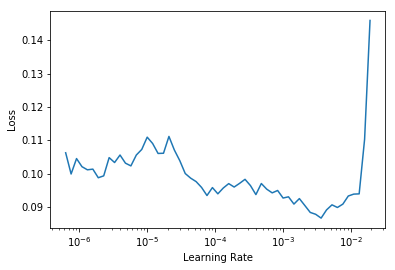

In [11]:
learn50.recorder.plot()

In [12]:
learn50.unfreeze()
learn50.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

Total time: 08:04
epoch  train_loss  valid_loss  error_rate
1      0.079394    0.136838    0.038544    (02:47)
2      0.069363    0.127278    0.034261    (02:38)
3      0.081599    0.133730    0.033191    (02:38)



In [18]:
learn50.save('stage-2-50')

ResNet101

In [29]:
dataX50 = ImageDataBunch.from_csv(path_img, csv_labels='../labels.csv',ds_tfms = get_transforms(), size=299, bs=bs//2)
dataX50.normalize(imagenet_stats) 

In [30]:
learnX50 = create_cnn(dataX50, models.resnet101, metrics=error_rate)

In [31]:
learnX50.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


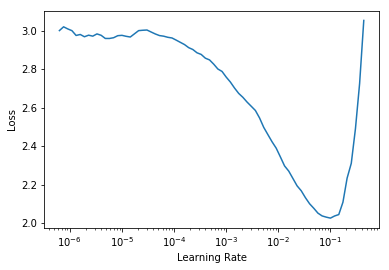

In [32]:
learnX50.recorder.plot()

In [33]:
learnX50.fit_one_cycle(8, max_lr=1e-2)

Total time: 25:44
epoch  train_loss  valid_loss  error_rate
1      0.576228    0.334685    0.095436    (03:24)
2      0.449689    0.650698    0.184647    (03:11)
3      0.530708    0.649111    0.190871    (03:11)
4      0.416172    0.407125    0.145228    (03:11)
5      0.336141    0.292572    0.104772    (03:11)
6      0.191825    0.111117    0.032158    (03:12)
7      0.123418    0.079788    0.025934    (03:11)
8      0.089618    0.081080    0.023859    (03:11)



In [34]:
learnX50.save('stage-1-X50')

In [39]:
learnX50.load('stage-1-X50')

In [38]:
learnX50.fit_one_cycle(3, max_lr=1e-2)

Total time: 12:34
epoch  train_loss  valid_loss  error_rate
1      1.555821    874.915710  0.898340    (04:14)
2      1.124724    2.816282    0.569502    (04:10)
3      0.743489    0.491563    0.161826    (04:09)



In [40]:
learnX50.unfreeze()

In [41]:
learnX50.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


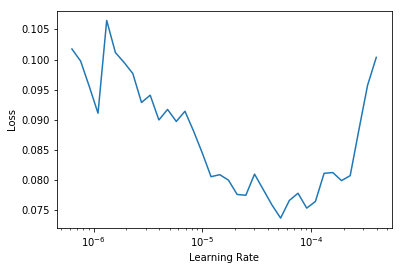

In [42]:
learnX50.recorder.plot()

In [43]:
learnX50.fit_one_cycle(3, max_lr=slice(3e-6,3e-5))

Total time: 12:34
epoch  train_loss  valid_loss  error_rate
1      0.091742    0.087532    0.026971    (04:11)
2      0.074860    0.083175    0.021784    (04:12)
3      0.060871    0.085211    0.022822    (04:11)



In [ ]:
learnX50.fit_one_cycle(3, max_lr=slice(3e-6,3e-5))